# Homework6.todo.ipynb

## Purpose

This homework is designed to give you practice on creating graphs and charts using the libraries provided in this course.

## Requirements

This is a group assignment.  Take a data set (either one provided, or using your group project data set), develop graphs using elements in your data set.  3 libraries were covered in this module, each student is to create 3 graphs, using each library to create that graph.  No two graphs should be the same. They can use the same style (e.g. 2x line graphs), but must then differ on the data points used.

It's recommended that you get this done very quickly, and as a group review them.  There will be extra things graded in this homework:

1.  Do you include labels, title, and relevant information about the graph.
2.  Does it render properly.
3.  Does the code used to generate said graph make sense, follow best practices as outlined in this course, and so on?


## Required Hand-in

One notebook should be handed in.  Following best practices I've outlined.  This homework is graded as a group homework.  The data set you pick to do graphs off of can be either one I'm providing as part of the repo, or of your group project.

Please label each graph with the original author (in code, comment above the implementation). You may group them by graph type (MatPlotlib all together, Seaborn all together, etc.) or by author (Student A all together, Student B all together, etc.)

Do not use the .todo as your template.  Analysis of the results of each graph isn't necessary, but do indicate the graphs you find represent the data you have most accurately.

## Other notes

This homework will be graded as a group.  Meaning, you all will get the same grade, regardless if a specific student's implementation is poorly done.  It will count for 60 points.  I strongly recommend you discuss as a group who will do what, then meet up at least a few days before the assignment is to be turned in and do a code review and merge of the individual notebooks.

# Setup the imports

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
from pytrends.request import TrendReq
import numpy as np
import pandas as pd

# Set the trend

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

# Setup Keyword Search, and pull the search results using pytrends for April 1 - June 30

In [3]:
keywords = ["AMC"] 
pytrends.build_payload(keywords, timeframe='2021-04-01 2021-06-30', geo='US')

# Show interest over time

In [4]:
amcSearchResults = pytrends.interest_over_time()
amcSearchResults

,AMC,isPartial
date,,
2021-04-01,15,False
2021-04-02,13,False
2021-04-03,13,False
2021-04-04,10,False
2021-04-05,12,False
...,...,...
2021-06-26,22,False
2021-06-27,19,False
2021-06-28,26,False


In [5]:
amcSearchResults = amcSearchResults.rename(columns={'AMC': 'Searched Count'})
amcSearchResults

,Searched Count,isPartial
date,,
2021-04-01,15,False
2021-04-02,13,False
2021-04-03,13,False
2021-04-04,10,False
2021-04-05,12,False
...,...,...
2021-06-26,22,False
2021-06-27,19,False
2021-06-28,26,False


# Use Yahoo Finance to pull Stock Data from April 1 - June 30

In [6]:
amcStockInfo = yf.download("AMC", start="2021-04-01", end="2021-06-30", interval="1d")
amcStockInfo.shape

[*********************100%***********************]  1 of 1 completed


(62, 6)

# Show the stock data

In [7]:
amcStockInfo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,10.230000,10.260000,9.150000,9.360000,9.360000,77473900
2021-04-05,10.100000,11.250000,9.720000,10.610000,10.610000,96082300
2021-04-06,10.400000,10.500000,10.000000,10.200000,10.200000,44067000
2021-04-07,10.070000,10.180000,9.850000,9.850000,9.850000,28804300
2021-04-08,10.010000,10.010000,9.500000,9.790000,9.790000,33408700
...,...,...,...,...,...,...
2021-06-23,57.040001,61.099998,56.799999,58.299999,58.299999,116291800
2021-06-24,57.980000,58.759998,55.660000,56.700001,56.700001,80351200
2021-06-25,55.750000,56.290001,52.970001,54.060001,54.060001,77596900


In [8]:
amcStockInfo["Change Value"] = amcStockInfo["Open"] - amcStockInfo["Close"]

In [9]:
amcMergedDataFrame = amcSearchResults.merge(amcStockInfo, how='inner', left_index=True, right_index=True)
amcMergedDataFrame

,Searched Count,isPartial,Open,High,Low,Close,Adj Close,Volume,Change Value
2021-04-01,15,False,10.230000,10.260000,9.150000,9.360000,9.360000,77473900,0.870000
2021-04-05,12,False,10.100000,11.250000,9.720000,10.610000,10.610000,96082300,-0.509999
2021-04-06,11,False,10.400000,10.500000,10.000000,10.200000,10.200000,44067000,0.200000
2021-04-07,10,False,10.070000,10.180000,9.850000,9.850000,9.850000,28804300,0.219999
2021-04-08,10,False,10.010000,10.010000,9.500000,9.790000,9.790000,33408700,0.220000
...,...,...,...,...,...,...,...,...,...
2021-06-23,25,False,57.040001,61.099998,56.799999,58.299999,58.299999,116291800,-1.259998
2021-06-24,25,False,57.980000,58.759998,55.660000,56.700001,56.700001,80351200,1.279999
2021-06-25,29,False,55.750000,56.290001,52.970001,54.060001,54.060001,77596900,1.689999
2021-06-28,26,False,55.099998,59.360001,54.330002,58.110001,58.110001,99310200,-3.010002


In [16]:
amcFiltered = amcMergedDataFrame[['Searched Count', 'Change Value']]

In [17]:
amcFiltered.head()
amcFiltered

,Searched Count,Change Value
2021-04-01,15,0.870000
2021-04-05,12,-0.509999
2021-04-06,11,0.200000
2021-04-07,10,0.219999
2021-04-08,10,0.220000
...,...,...
2021-06-23,25,-1.259998
2021-06-24,25,1.279999
2021-06-25,29,1.689999
2021-06-28,26,-3.010002


<AxesSubplot:>

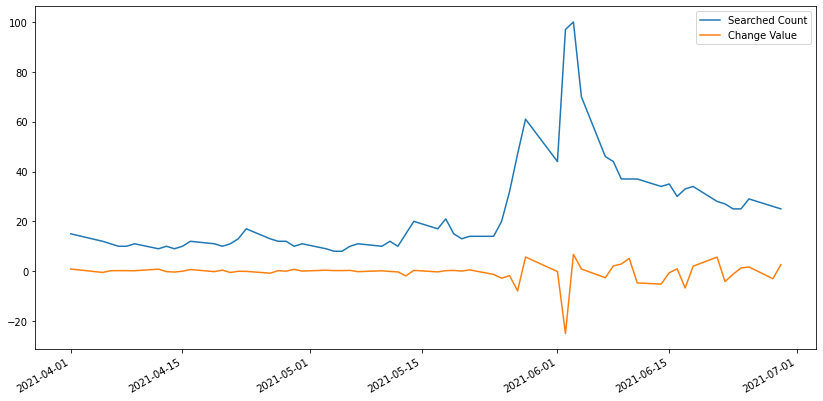

In [18]:

amcFiltered.plot(figsize=(14, 7))